# Data Visualisation

## Import Required Modules

In [370]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

## Import Data

In [371]:
demand_df = pd.read_csv('demand.csv', parse_dates=['Date'])
demand_df = demand_df.fillna(method='ffill')
demand_df.head()

,Date,Building0,Building1,Building3,Building4,Building5,Building6,Solar0,Solar1,Solar2,Solar3,Solar4,Solar5
0,2016-07-03 21:30:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-03 21:45:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-03 22:00:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-03 22:15:00,606.0,NaN,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-03 22:30:00,606.0,NaN,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [372]:
price_df = pd.read_csv('price.csv', parse_dates=['Date'])
price_df.head()

,Date,TOTALDEMAND,RRP
0,2020-10-01 00:30:00,4670.40,39.09
1,2020-10-01 01:00:00,4513.84,38.39
2,2020-10-01 01:30:00,4329.71,36.46
3,2020-10-01 02:00:00,4146.21,35.79
4,2020-10-01 02:30:00,4003.90,33.65


In [373]:
weather_df = pd.read_csv('weather.csv', parse_dates=['Date'])
weather_df.head()

,Date,olympic_max_temp,moorabbin_max_temp,olympic_min_temp,moorabbin_min_temp,olympic_rain,oakleigh_rain,moorabbin_rain,olympic_solar,oakleigh_solar,moorabbin_solar
0,2013-01-01,NaN,22.8,NaN,13.3,NaN,0.0,0.0,31.1,30.5,29.4
1,2013-01-02,NaN,20.5,NaN,12.6,NaN,0.0,0.0,31.9,32.8,33.0
2,2013-01-03,NaN,36.5,NaN,12.0,NaN,0.0,0.0,32.8,32.2,31.9
3,2013-01-04,NaN,41.5,NaN,18.6,NaN,0.0,0.0,33.5,33.6,33.6
4,2013-01-05,NaN,26.2,NaN,18.8,NaN,0.0,0.0,30.5,31.4,29.6


## Smooth Peaks

In [374]:
from scipy.signal import find_peaks

In [375]:
def smooth_like_butter(peaks, ar):
    '''
    Input in a list with all the indexes that have peaks and returns an array with all 
    the indexes being smoothed by taking the mean of the previous and the next value
    '''
    import copy
    arr = copy.copy(ar)
    for peak in peaks:
        i = 1
        j = 1
        while arr[peak + i] == arr[peak]:
            i += 1
        while arr[peak - j] == arr[peak]:
            j += 1
        val = (arr[peak + i] + arr[peak - j]) / 2
        arr[peak - j:peak + i] = val
    return arr

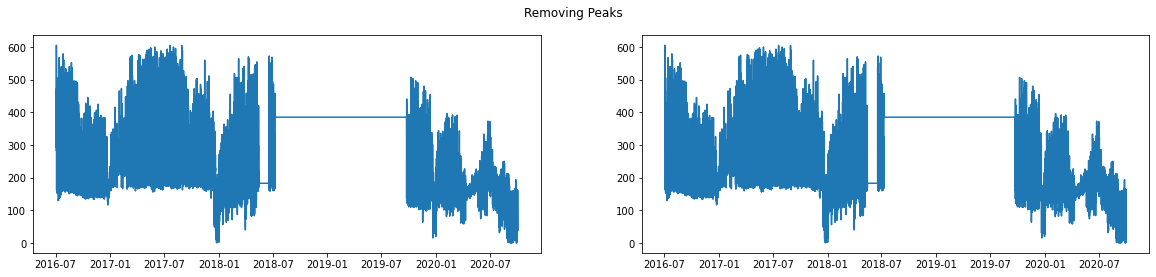

In [404]:
#Removing Peaks

#create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(20,4))

#find peaks and append to array
peaks, _ = find_peaks(demand_df['Building0'], height=700)
Building0_peaks = np.zeros(len(demand_df))
Building0_peaks[:] = np.NaN
for i in peaks:
    Building0_peaks[i] = demand_df['Building0'][i]

#plot original with peaks
axs[0].plot(demand_df['Date'], demand_df['Building0'])
axs[0].plot(demand_df['Date'], Building0_peaks, "x")

#plot after applying function
demand_df['Building0'] = smooth_like_butter(peaks, demand_df['Building0'])
axs[1].plot(demand_df['Date'], demand_df['Building0'])

fig.suptitle("Removing Peaks")
plt.show()

## Data Visualisation

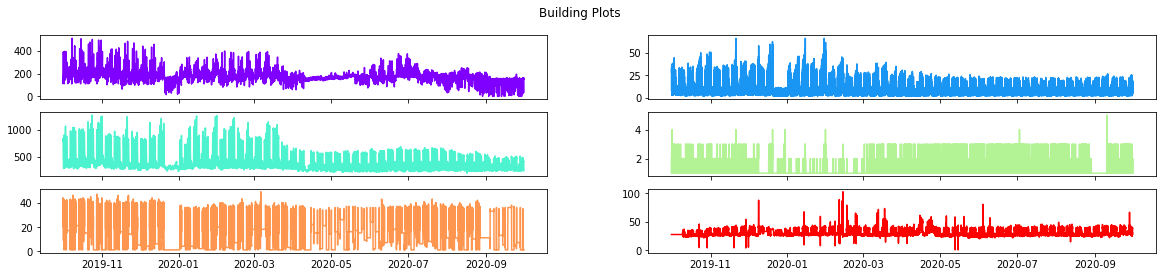

In [500]:
#Plot Building Demand

#generate start and end dates
start_date = '2019-09-30 23:45:00'
end_date = '2020-09-30 23:45:00'
mask = (demand_df['Date'] > start_date) & (demand_df['Date'] <= end_date)

#create figure and subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 4), sharex=True)
color=cm.rainbow(np.linspace(0,1,6))
for col, ax, c in zip([col for col in demand_df.columns if "Building" in col], axes.flatten(), color):
    ax.plot(demand_df.loc[mask]['Date'], demand_df.loc[mask][col], color=c)
fig.suptitle("Building Plots")
plt.show()

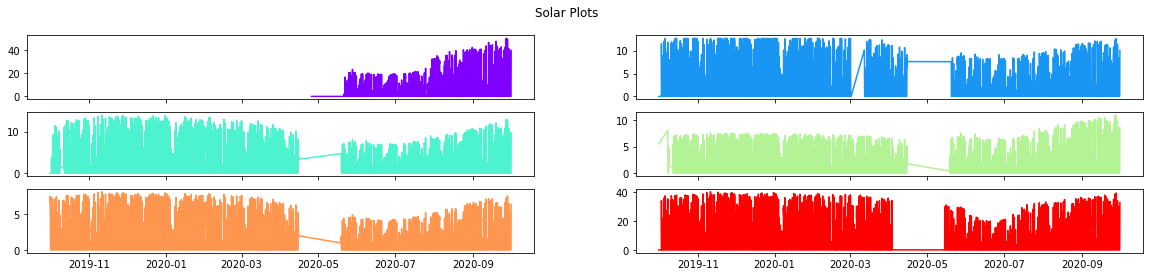

In [400]:
#Plot Solar Power

#generate start and end dates
start_date = '2019-09-30 23:45:00'
end_date = '2020-09-30 23:45:00'
mask = (demand_df['Date'] > start_date) & (demand_df['Date'] <= end_date)

#create figure and subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 4), sharex=True)
color=cm.rainbow(np.linspace(0,1,6))
for col, ax, c in zip([col for col in demand_df.columns if "Solar" in col], axes.flatten(), color):
    ax.plot(demand_df.loc[mask]['Date'], demand_df.loc[mask][col], color=c)
fig.suptitle("Solar Plots")
plt.show()

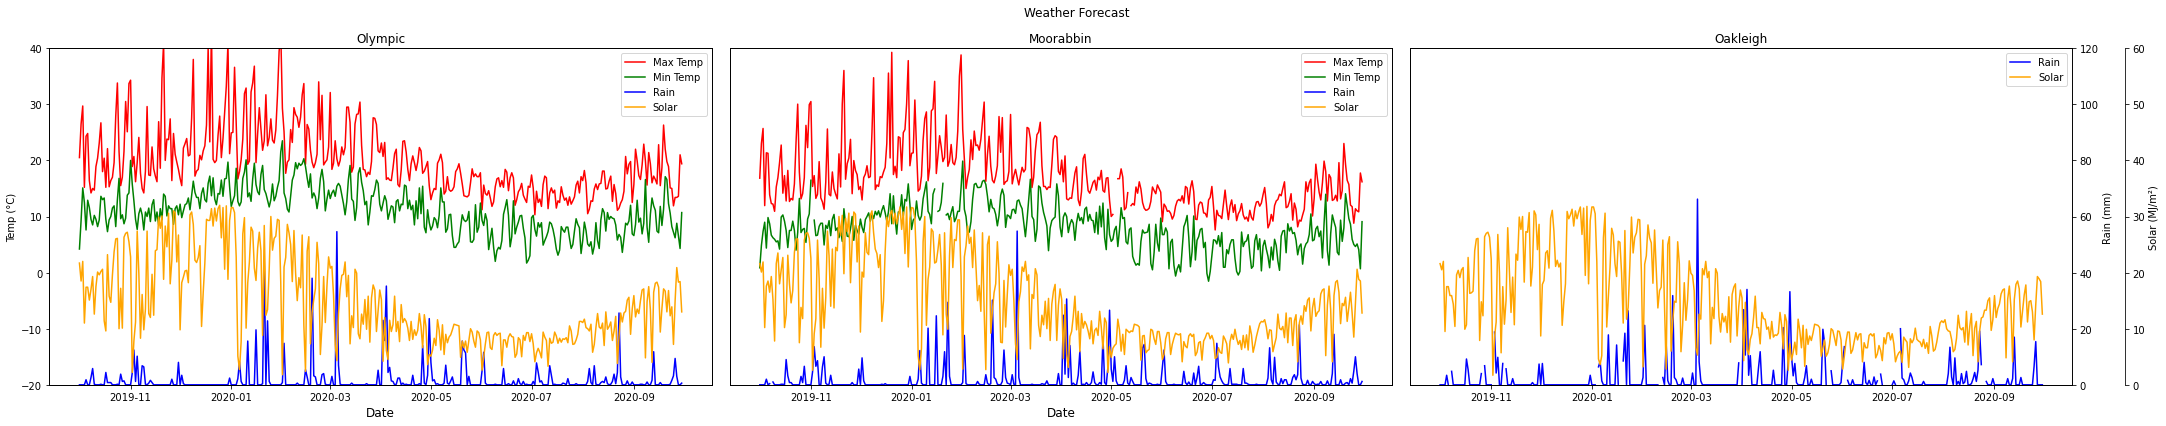

In [499]:
#Plot Weather Forecast

#generate start and end dates
start_date = '2019-09-30'
end_date = '2020-09-30'
mask = (weather_df['Date'] > start_date) & (weather_df['Date'] <= end_date)

#create figure and subplots
fig, ax = plt.subplots(1, 3, figsize=(30, 6))

#olympic plot
line1 = ax[0].plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['olympic_max_temp'], color='red', label="Max Temp")
line2 = ax[0].plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['olympic_min_temp'], color='green', label="Min Temp")
ax[0].set_xlabel("Date", fontsize=12)
ax[0].set_ylim(-20, 40)

ax1 = ax[0].twinx()
line3 = ax1.plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['olympic_rain'], color='blue', label="Rain")
ax1.set_ylim(0, 120)
    
ax2 = ax[0].twinx()
line4 = ax2.plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['olympic_solar'], color='orange', label="Solar")
ax2.set_ylim(0, 60)

lines = line1+line2+line3+line4
labels = [l.get_label() for l in lines]
ax[0].legend(lines, labels, loc='best')
ax[0].set_title("Olympic")

#moorabbin plot
line1 = ax[1].plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['moorabbin_max_temp'], color='red', label="Max Temp")
line2 = ax[1].plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['moorabbin_min_temp'], color='green', label="Min Temp")
ax[1].set_xlabel("Date", fontsize=12)
ax[1].set_ylim(-20, 45)

ax3 = ax[1].twinx()
line3 = ax3.plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['moorabbin_rain'], color='blue', label="Rain")
ax3.set_ylim(0, 120)
    
ax4 = ax[1].twinx()
line4 = ax4.plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['moorabbin_solar'], color='orange', label="Solar")
ax4.set_ylim(0, 60)

lines = line1+line2+line3+line4
labels = [l.get_label() for l in lines]
ax[1].legend(lines, labels, loc='best')
ax[1].set_title("Moorabbin")

#oakleigh plot
ax5 = ax[2].twinx()
line1 = ax5.plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['oakleigh_rain'], color='blue', label="Rain")
ax5.set_ylim(0, 120)

ax6 = ax[2].twinx()
line2 = ax6.plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['oakleigh_solar'], color='orange', label="Solar")
ax6.spines['right'].set_position(('axes', 1.08))
ax6.set_ylim(0, 60)

lines = line1+line2
labels = [l.get_label() for l in lines]
ax[2].legend(lines, labels, loc='best')
ax[2].set_title("Oakleigh")

#format figure
ax[0].set_ylabel("Temp (°C)")
ax5.set_ylabel("Rain (mm)")
ax6.set_ylabel("Solar (MJ/m²)")
ax1.axes.yaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
ax3.axes.yaxis.set_visible(False)
ax4.axes.yaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)
ax[2].axes.yaxis.set_visible(False)
fig.suptitle('Weather Forecast')
fig.tight_layout()
plt.show()